In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib
import warnings
warnings.filterwarnings("ignore")


In [4]:
 df=pd.read_csv("sbi life insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


In [7]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [9]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
989,24,0,20.520,0,1,0,14571.89080,1
863,36,0,19.855,0,0,0,5458.04645,0
451,30,1,24.130,1,0,1,4032.24070,0
462,62,0,38.095,2,0,0,15230.32405,1
801,64,0,35.970,0,0,2,14313.84630,1


In [10]:
print(df.nunique())

age                 47
sex                  2
bmi                548
children             6
smoker               2
region               4
charges           1337
insuranceclaim       2
dtype: int64


In [11]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

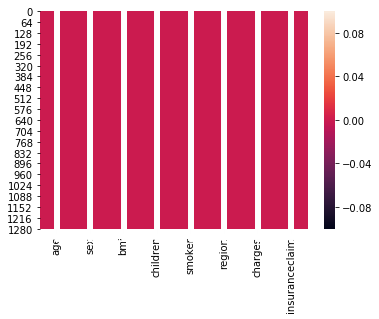

In [12]:
sns.heatmap(df.isnull(),annot=True)
plt.show()

In [14]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [15]:
from scipy.stats import zscore
zscore=abs(zscore(df))
print(df.shape)
df_final=df.loc[(zscore<3).all(axis=1)]
print(df_final.shape)

(1338, 8)
(1309, 8)


In [16]:
df_final.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.019253,0.118178,0.059100,-0.029090,0.003121,0.305263,0.109386
sex,-0.019253,1.000000,0.042498,0.014056,0.079058,0.003084,0.059455,0.027759
bmi,0.118178,0.042498,1.000000,0.029916,-0.005288,0.160126,0.191453,0.383589
children,0.059100,0.014056,0.029916,1.000000,0.028844,-0.002976,0.100438,-0.410709
smoker,-0.029090,0.079058,-0.005288,0.028844,1.000000,-0.003474,0.785129,0.330193
region,0.003121,0.003084,0.160126,-0.002976,-0.003474,1.000000,-0.007633,0.026123
charges,0.305263,0.059455,0.191453,0.100438,0.785129,-0.007633,1.000000,0.303749
insuranceclaim,0.109386,0.027759,0.383589,-0.410709,0.330193,0.026123,0.303749,1.000000


In [17]:
df_final.skew()

age               0.051340
sex              -0.010708
bmi               0.191432
children          0.738119
smoker            1.482731
region           -0.023027
charges           1.437160
insuranceclaim   -0.352569
dtype: float64

In [18]:
for col in df_final.columns:
    if df_final.skew().loc[col]>0.55:
        df_final[col]=np.log1p(df_final[col])
df_final.skew()

age               0.051340
sex              -0.010708
bmi               0.191432
children          0.225539
smoker            1.482731
region           -0.023027
charges          -0.107087
insuranceclaim   -0.352569
dtype: float64

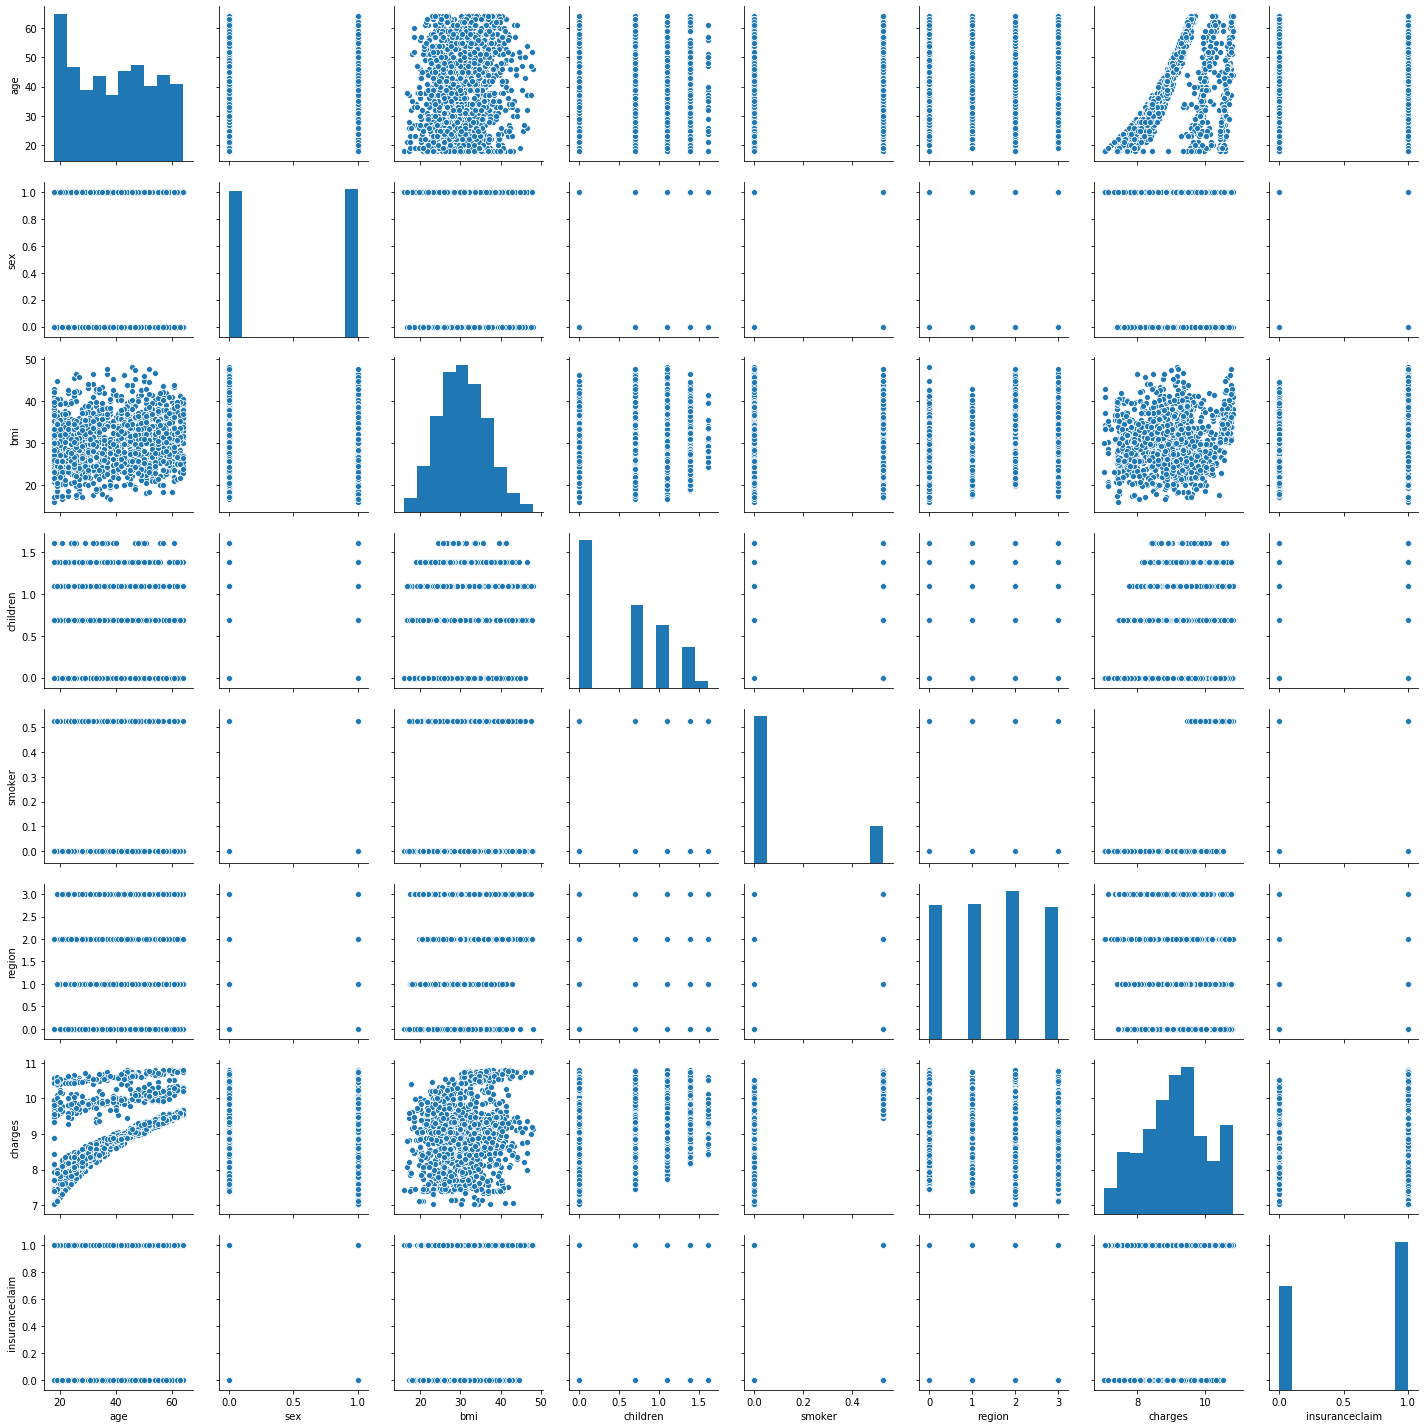

In [24]:
sns.pairplot(df_final)
plt.show()

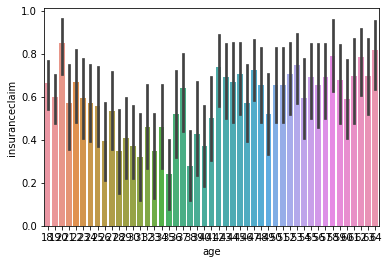

In [25]:
sns.barplot(x="age",y="insuranceclaim",data=df_final)
plt.show()

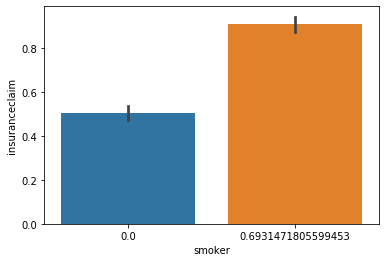

In [52]:
sns.barplot(x="smoker",y="insuranceclaim",data=df_final)
plt.show()

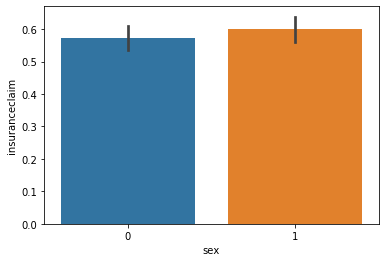

In [53]:
sns.barplot(x="sex",y="insuranceclaim",data=df_final)
plt.show()

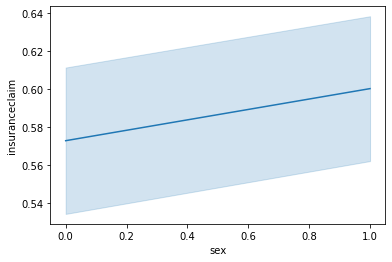

In [56]:
sns.lineplot(x="sex",y="insuranceclaim",data=df_final)
plt.show()

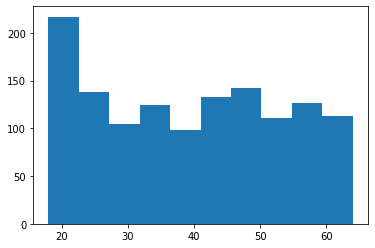

In [57]:
plt.hist(x="age",bins=10,data=df_final)
plt.show()

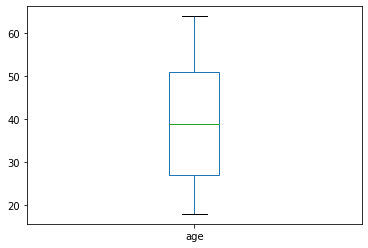

In [60]:
df_final["age"].plot.box()

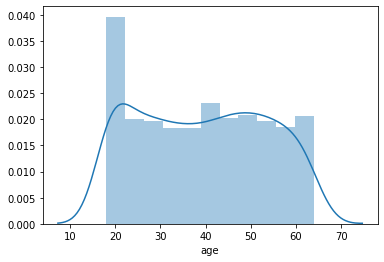

In [61]:
sns.distplot(df_final["age"])

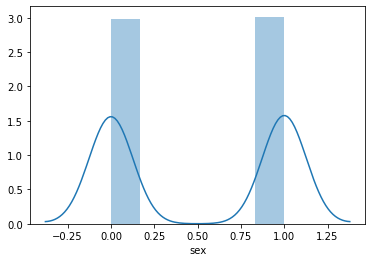

In [62]:
sns.distplot(df_final["sex"])

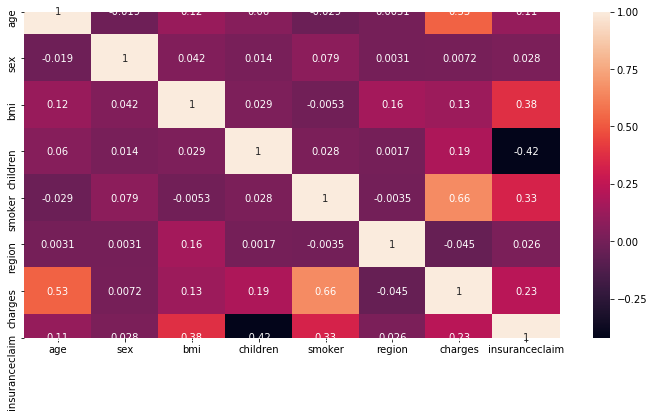

In [63]:
plt.figure(figsize=(12,6))
sns.heatmap(df_final.corr(),annot=True)

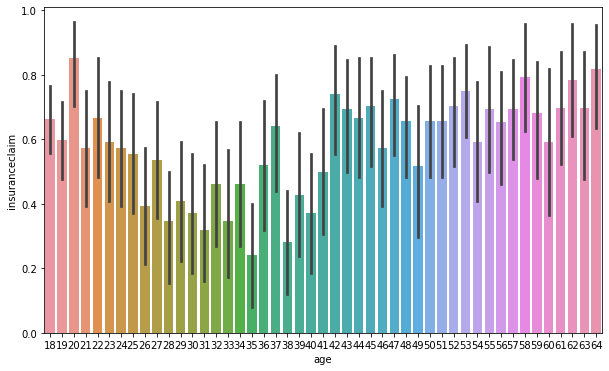

In [65]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x="age",y="insuranceclaim",data=df_final)

In [19]:
x=df_final.drop(columns=["insuranceclaim"])
y=df_final[["insuranceclaim"]]

In [20]:
 x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = 55,test_size=0.20)

In [21]:
x_train.shape

(1047, 7)

In [22]:
x_test.shape

(262, 7)

In [23]:
y_train.shape

(1047, 1)

In [24]:
y_test.shape

(262, 1)

In [25]:
from sklearn import linear_model
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(60,100):
    x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is: ",max_r_score)

max r2 score corresponding to  85  is:  0.519232309392766


In [26]:
from sklearn.model_selection  import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y, cv=10,scoring="r2").mean()

0.45735081049275994

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
lg=LogisticRegression()

In [28]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
lg.score(x_train,y_train)

0.874880611270296

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
import sklearn.metrics as metrics
predicted = cross_val_predict(lg, x, y, cv=10)
metrics.accuracy_score(y, predicted) 

from sklearn.model_selection import cross_validate
accuracy = cross_val_score(lg, x, y, cv=10,scoring='accuracy')
print (accuracy)
print (cross_val_score(lg, x, y, cv=10,scoring='accuracy').mean())

[0.83969466 0.86259542 0.88549618 0.88549618 0.8778626  0.87022901
 0.85496183 0.89312977 0.88549618 0.83846154]
0.8693423370522607


In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(lg, x, y, cv=10, scoring='accuracy').mean())

0.8693423370522607


In [33]:
pred=lg.predict(x_test)
print(pred)

[1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 0]


In [34]:
print("accuracy_score",accuracy_score(pred,y_test))

accuracy_score 0.8664122137404581


In [35]:
print(confusion_matrix(y_test,pred))

[[ 78  19]
 [ 16 149]]


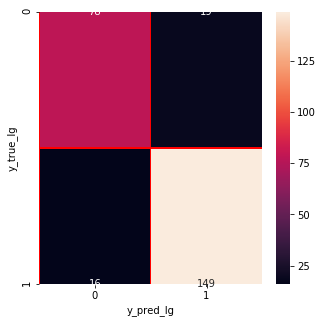

In [36]:
from sklearn.metrics import confusion_matrix
y_pred_lg = lg.predict(x_test)
y_true_lg = y_test
cm = confusion_matrix(y_true_lg, y_pred_lg)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lg")
plt.ylabel("y_true_lg")
plt.show()

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Test Accuracy: 98.09%


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 93.89%


In [39]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy: 82.82%


In [40]:
from sklearn.externals import joblib
joblib.dump(dt, "dt_baseball.pk1")

['dt_baseball.pk1']